In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

In [2]:
%matplotlib notebook

# Select data

## IGNORE THESE:
##### V1:  JC076-20190501, JC083-20190510
    - if rfs only, ignore: JC083-20190510, JC083-20190511, 
    
    - if blobs & rfs only, ignore: JC083_20190510, JC083-20190511
    
    - if ALL stimuli, ignore: JC083-20190507, JC083-20190510, 
    
#### Lm:  JC078-20190509, JC080-20190506, JC083-20190517
    - if rfs only, ignore: JC078-20190504, JC078-2019513, 
                           JC083-20190512

    - if blobs & rfs: ignore: JC078-20190426, JC078-2019513
                              JC083-20190512
                              
    - if ALL stimuli, ignore: JC078-20190430, JC078-20190426, JC078-20190504
                              JC083-20190508
#### Li:  JC076-20190422, JC099-20190509, JC091-20190607, JC091-20190606
    

In [3]:
always_exclude = ['JC076-20190501', 'JC083-20190510', 
                  'JC078-20190426', 'JC078-20190509', 'JC080-20190506', 'JC083-20190517',
                 'JC076-20190422', 'JC099-20190509', 'JC091-20190607', 'JC091-20190606']
also_exclude = ['JC078-2019513', 'JC083-20190512']

excluded_sessions = copy.copy(always_exclude)
excluded_sessions.extend(also_exclude)
print(len(excluded_sessions))

12


# Set responsivity params

In [463]:
responsive_test = 'ROC' #'nstds'
responsive_thr = 0.05 #10.
n_stds = '0' #2.5
experiment_type = 'blobs'

# Get aggregate data

In [464]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

/n/coxfs01/julianarhee/aggregate-visual-areas


In [465]:
sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)
#dsets = sdata[sdata['experiment']==experiment_type]

In [173]:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)

Creating new session object...
[JC084] 20190522 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC084] 20190522 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC084] 20190525 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
[JC084] Li - skipping
[JC111] V1 - skipping
[JC111] Lm - skipping
Creating new session object...
[JC111] 20191003 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
[JC091] V1 - skipping
Creating new session object...
[JC091] 20190627 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC091] 20191008 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC091 | 20191008 | FOV1_zoom2p0x)
... Getting screen info
Creating new sessi

... Getting screen info
[JC078] Li - skipping
[JC080] V1 - skipping
Creating new session object...
[JC080] 20190603 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC080] 20190506 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC080] 20190602 - FOV2_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC080] 20190602 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
Creating new session object...
[JC083] 20190510 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC083 | 20190510 | FOV1_zoom2p0x)
... Getting screen info
Creating new session object...
[JC083] 20190507 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC083 | 20190507 | FOV1_zoom2p0x)
... Getting screen i

In [174]:

print(sdata.shape)
print(sdata.drop_duplicates().shape)


(211, 5)
(195, 5)


In [176]:
sdata = sdata.drop_duplicates().reset_index(drop=True)

In [466]:
sdata.shape

(193, 5)

In [7]:
stats_desc = util.get_stats_desc(traceid=optsE.traceid,
                                      trace_type= optsE.trace_type,
                                      response_type = response_type,
                                      responsive_test = responsive_test,
                                      responsive_thr = responsive_thr,
                                      n_stds = n_stds)
print(stats_desc)

stats-traces001-corrected-dff-nstds-thr-10.00


In [8]:
os.listdir(aggregate_dir)

['responsivity',
 'dataset_info.pkl',
 'receptive-fields',
 'orientation-tuning',
 'test-stats-plotting',
 'roi_positions.pkl',
 'spatial-correlations',
 'data-stats',
 'blob-classification',
 'blob-classification-tests',
 'widefield-maps',
 'gratings-tuning',
 'blobs-tuning',
 'tensors',
 'colormaps',
 'retinotopy',
 'rfs',
 'avg-conds-by-area-by-exp_active-cells.pkl',
 '.DS_Store',
 '._.DS_Store',
 'heatmaps',
 'summaries',
 'cnn-analysis']

# Create output dir for analysis


In [9]:
outdir = os.path.join(aggregate_dir, 'responsivity', stats_desc)
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/responsivity/stats-traces001-corrected-dff-nstds-thr-10.00


In [10]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [11]:
# Set plotting params
threshold_dff = True
min_dff = 0.03
cmap = 'inferno'
n_sz = 5
n_mp = 10

tune_name='morph'

incorrect_nvalues = []


In [22]:
sdata.shape

(195, 6)

In [25]:
sdata

,index,animalid,experiment,fov,session,visual_area
0,0,JC084,rfs,FOV1_zoom2p0x,20190522,V1
1,1,JC084,gratings,FOV1_zoom2p0x,20190522,V1
2,2,JC084,blobs,FOV1_zoom2p0x,20190522,V1
3,3,JC084,retino,FOV1_zoom2p0x,20190522,V1
4,8,JC084,rfs,FOV1_zoom2p0x,20190525,Lm
5,9,JC084,gratings,FOV1_zoom2p0x,20190525,Lm
6,10,JC084,blobs,FOV1_zoom2p0x,20190525,Lm
7,11,JC084,retino,FOV1_zoom2p0x,20190525,Lm
8,12,JC111,retino,FOV1_zoom2p0x,20191003,Li
9,13,JC111,rfs10,FOV1_zoom2p0x,20191003,Li


In [82]:
sdata[(sdata['animalid']=='JC110') & (sdata['session']=='20191004') & (sdata['fov']=='FOV1_zoom2p0x')]

,index,animalid,experiment,fov,session,visual_area
90,94,JC110,rfs10,FOV1_zoom2p0x,20191004,V1


In [171]:
sdata.iloc[90]

index                     95
animalid               JC110
experiment            retino
fov            FOV2_zoom2p0x
session             20191004
visual_area               V1
Name: 90, dtype: object

In [182]:
igns = sdata[sdata['experiment'].isin(['XgratingsX', 'xblobsx'])].index.tolist()
kixs = [i for i in sdata.index.tolist() if i not in igns]
sdata = sdata.loc[kixs].reset_index(drop=True)


In [186]:
sdata[sdata['experiment'].isin(['XgratingsX', 'xblobsx'])]

,animalid,experiment,fov,session,visual_area


In [184]:
sdata.shape

(193, 5)

In [185]:
with open(sdata_fpath, 'wb') as f:
    pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)

# Count cells

In [497]:
reload(util)

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py'>

In [187]:
tmp_ignore = [#'JC091_20190614_FOV1_zoom2p0x_retino',
              'JC083_20190507_FOV1_zoom2p0x_retino',
              'JC083_20190508_FOV1_zoom2p0x_retino',
              
              'JC113_20191108_FOV2_zoom2p0x_retino',
              'JC113_20191108_FOV2_zoom2p0x_rfs10',
              
              'JC113_20191108_FOV1_zoom2p0x_retino',
              'JC113_20191108_FOV1_zoom2p0x_rfs10',

              'JC110_20191004_FOV1_zoom2p0x_rfs10']


In [191]:
sdata.loc[ix].values

array(['JC084', 'rfs', 'FOV1_zoom2p0x', '20190522', 'V1'], dtype=object)

In [467]:
responsive_test


'ROC'

In [468]:
responsive_thr

0.05

In [499]:
ncells_active = []
ncells_total = []
keep_ixs = []

missing_roc = []

#for (visual_area, animalid, session, fov, exp), g in sdata.groupby(['visual_area', 'animalid', 'session', 'fov', 'experiment']):
for ix in sdata.index.tolist():
    animalid, experiment, fov, session, visual_area = sdata.loc[ix].values
    
    dkey = '_'.join([animalid, session, fov, experiment])
    if dkey in tmp_ignore:
        continue
        
    print('--- %s --- ' % experiment)
    if experiment == 'gratings':
        exp = util.Gratings(animalid, session, fov, traceid=traceid, rootdir=rootdir)
    elif experiment == 'blobs':
        exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
    elif experiment in ['rfs', 'rfs10']:
        exp = util.ReceptiveFields(experiment, animalid, session, fov, traceid=traceid)
    elif experiment == 'retino':
        exp = util.Retinobar(animalid, session, fov, traceid=traceid) #'analysis002')
    
    if 'retino' in experiment:
        rstats, roi_list, nrois_total, trials_by_cond = exp.get_responsive_cells(responsive_thr=0.01)
    else:
        
        roi_list, nrois_total = exp.get_responsive_cells(responsive_test=responsive_test, responsive_thr=responsive_thr)

    if roi_list is None:
        missing_roc.append(dkey)
        continue
    else:    
        ncells_active.append(len(roi_list))
        ncells_total.append(nrois_total)
        keep_ixs.append(ix)
    

--- rfs --- 
... [JC084|20190522|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/rfs_run1/traces/traces001_b78b04/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/rfs_run2/traces/traces001_5c60f6/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/rfs_run3/traces/traces001_7a5ecd/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/rfs_run4/traces/traces001_c80ac8/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/rfs_run5/traces/traces001_656bda/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/rfs_run6/traces/traces001_f17a03/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_b78b04_traces001_5c60f6_traces001_7a5ecd_traces001_c80ac8_traces001_656bda_traces001_f17a03/data_arrays/datasets.npz', 

{u'top': [10, 5, 9], u'right': [1, 2, 7], u'bottom': [11, 6, 8], u'left': [12, 3, 4]}
... updating self
('--> loaded RetinoBar data:', (26796, 238))
Target freq: 0.240 Hz
--- retino --- 
... [JC111|20191003|FOV1_zoom2p0x] creating retinobar object
GET ROI SET: rois001
['/n/coxfs01/2p-data/JC111/20191003/FOV1_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC111/20191003/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_c5fb1d/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC111/20191003/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis002_159411/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'blank': [11, 10, 12, 3], u'top': [13, 17, 18, 6], u'right': [1, 5, 7, 9], u'left': [14, 20, 2, 8], u'bottom': [15, 16, 19, 4]}
... updating self
('--> loaded Ret

GET ROI SET: rois001
['/n/coxfs01/2p-data/JC091/20190627/FOV1_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC091/20190627/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_d24466/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC091/20190627/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis002_1433e4/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'top': [2, 4, 7, 9], u'right': [11, 16, 5, 6], u'left': [10, 13, 14, 1], u'bottom': [12, 15, 3, 8]}
... updating self
('--> loaded RetinoBar data:', (35728, 317))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC091|20191008|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC091/20191008/FOV1_zoom2p0x/rfs10_run1/traces/traces001_e

{u'blank': [11, 7, 6, 9], u'top': [10, 18, 1, 4], u'right': [17, 19, 20, 5], u'left': [14, 16, 3, 8], u'bottom': [13, 12, 15, 2]}
... updating self
('--> loaded RetinoBar data:', (44660, 560))
Target freq: 0.240 Hz
--- rfs --- 
... [JC091|20191007|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/rfs_run1/traces/traces001_dc94e5/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/rfs_run2/traces/traces001_364977/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/rfs_run3/traces/traces001_b0e771/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/rfs_run4/traces/traces001_443bb0/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/rfs_run5/traces/traces001_e810d0/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20191007/FOV1_zoom2p0x/rfs_run7/traces/traces001_65138d/data_arrays/datas

--- retino --- 
... [JC091|20190607|FOV1_zoom2p0x] creating retinobar object
GET ROI SET: rois001
['/n/coxfs01/2p-data/JC091/20190607/FOV1_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC091/20190607/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_735ab2/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC091/20190607/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis002_a79b6d/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'top': [11, 15, 14, 4], u'right': [12, 1, 2, 8], u'left': [10, 3, 6, 9], u'bottom': [13, 16, 5, 7]}
... updating self
('--> loaded RetinoBar data:', (35728, 526))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC091|20190614|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data paths - name: rfs10
('FOUND RUNS:', ['

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run1/traces/traces001_c8905e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run2/traces/traces001_cca83f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run3/traces/traces001_282089/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run4/traces/traces001_d63f40/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run5/traces/traces001_5e8ae8/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run6/traces/traces001_d9484e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/blobs_run7/traces/traces001_a6f53c/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190606/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_c8905e_traces001_cca83f_traces001_282089_traces001_d63f40_tr

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/blobs_run1/traces/traces001_573669/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/blobs_run2/traces/traces001_3d2687/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/blobs_run3/traces/traces001_17838a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/blobs_run4/traces/traces001_452178/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/blobs_run5/traces/traces001_c84a17/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/blobs_run6/traces/traces001_faae98/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_573669_traces001_3d2687_traces001_17838a_traces001_452178_traces001_c84a17_traces001_faae98/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_573669_traces001_3d268

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/blobs_run1/traces/traces001_6da5ed/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/blobs_run2/traces/traces001_19b5de/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/blobs_run3/traces/traces001_565a1c/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/blobs_run4/traces/traces001_238b5b/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/blobs_run5/traces/traces001_cb35ec/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/blobs_run6/traces/traces001_6537ce/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_6da5ed_traces001_19b5de_traces001_565a1c_traces001_238b5b_traces001_cb35ec_traces001_6537ce/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_6da5ed_traces001_19b5d

... loading RF fits (response-type: dff)
... got rf fits
--- gratings --- 
... [JC092|20190527|FOV3_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/gratings_run1/traces/traces001_c03491/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/combined_gratings_static/traces/traces001_c03491/data_arrays/labels.npz', '/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/combined_gratings_static/traces/traces001_c03491/data_arrays/neuropil.npz', '/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/combined_gratings_static/traces/traces001_c03491/data_arrays/np_subtracted.npz', '/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/combined_gratings_static/traces/traces001_c03491/data_arrays/raw.npz', '/n/coxfs01/2p-data/JC092/20190527/FOV3_zoom2p0x/combined_gratings_static/traces/traces001_c03491/data_arrays/datasets.npz'])
... renaming experiment to run name: combined_gra

GET ROI SET: rois001
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/rfs10_run1/traces/traces001_42e6c7/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/rfs10_run2/traces/traces001_db48cb/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/rfs10_run3/traces/traces001_a36e01/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/rfs10_run4/traces/traces001_3bc912/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_42e6c7_traces001_db48cb_traces001_a36e01_traces001_3bc912/data_arrays/datasets.npz'])
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
--- gratings --- 
... [JC090|20190605|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
(

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/blobs_run1/traces/traces001_d86de1/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/blobs_run2/traces/traces001_8df9ce/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/blobs_run3/traces/traces001_61ca30/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/blobs_run4/traces/traces001_0266b8/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/blobs_run5/traces/traces001_111679/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/blobs_run6/traces/traces001_0abebe/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_d86de1_traces001_8df9ce_traces001_61ca30_traces001_0266b8_traces001_111679_traces001_0abebe/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190612/FOV1_zoom2p0x/com

... updating self
('--> loaded RetinoBar data:', (35728, 102))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC099|20190609|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC099/20190609/FOV1_zoom2p0x/rfs10_run1/traces/traces001_f96aeb/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190609/FOV1_zoom2p0x/rfs10_run2/traces/traces001_e2d7ba/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190609/FOV1_zoom2p0x/rfs10_run3/traces/traces001_6e3eae/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190609/FOV1_zoom2p0x/rfs10_run4/traces/traces001_5d2fdc/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC099/20190609/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_f96aeb_traces001_e2d7ba_traces001_6e3eae_traces001_5d2fdc/data_arrays/datasets.npz'])
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)

... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
--- rfs --- 
... [JC097|20190617|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/rfs_run1/traces/traces001_f924db/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/rfs_run3/traces/traces001_db2b5e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/rfs_run2/traces/traces001_85f376/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/rfs_run4/traces/traces001_acfba1/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/rfs_run5/traces/traces001_c58358/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/rfs_run6/traces/traces001_205616/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_f924db_trac

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/rfs10_run1/traces/traces001_30490f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/rfs10_run2/traces/traces001_8ad808/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_30490f_traces001_8ad808/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_30490f_traces001_8ad808/data_arrays/labels.npz', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_30490f_traces001_8ad808/data_arrays/neuropil.npz', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_30490f_traces001_8ad808/data_arrays/np_subtracted.npz', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_rfs10_static/traces/traces001_30490f_traces001_8ad808/data_arrays/raw.npz'])
... renaming experiment to run name: combined_rfs10_static
... chec

... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
--- gratings --- 
... [JC097|20190613|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/gratings_run1/traces/traces001_c09a6a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/gratings_run2/traces/traces001_b5507e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/gratings_run3/traces/traces001_c49401/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/gratings_run4/traces/traces001_446964/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_c09a6a_traces001_b5507e_traces001_c49401_traces001_446964/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_c09a6a_traces

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/gratings_run1/traces/traces001_c78c61/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/gratings_run2/traces/traces001_81bb92/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/gratings_run3/traces/traces001_a1405a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/gratings_run4/traces/traces001_5c3be4/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_c78c61_traces001_81bb92_traces001_a1405a_traces001_5c3be4/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_c78c61_traces001_81bb92_traces001_a1405a_traces001_5c3be4/data_arrays/labels.npz', '/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_c78c61_traces001_81bb92_traces001_a1405a_traces001_5c3be4/data_arrays/neuropil.npz', '

GET ROI SET: rois003
['/n/coxfs01/2p-data/JC110/20191004/FOV3_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC110/20191004/FOV3_zoom2p0x/retino_run1/retino_analysis/analysis001_34762e/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC110/20191004/FOV3_zoom2p0x/retino_run1/retino_analysis/analysis002_7363eb/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'bottom': [11, 10, 14, 1], u'top': [13, 19, 18, 3], u'right': [12, 4, 7, 8], u'left': [15, 17, 20, 5], u'blank': [16, 2, 6, 9]}
... updating self
('--> loaded RetinoBar data:', (44660, 347))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC110|20191004|FOV3_zoom2p0x] creating rfs10 object
GET ROI SET: rois003
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC110/20191004/FOV3_zoom2p0x/r

... got rf fits
--- retino --- 
... [JC117|20191104|FOV1_zoom2p0x] creating retinobar object
GET ROI SET: rois001
['/n/coxfs01/2p-data/JC117/20191104/FOV1_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC117/20191104/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_b6da1c/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC117/20191104/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis002_2a1f7c/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'blank': [11, 12, 16, 19], u'top': [10, 18, 1, 4], u'right': [13, 17, 3, 6], u'bottom': [15, 14, 20, 7], u'left': [2, 5, 9, 8]}
... updating self
('--> loaded RetinoBar data:', (44660, 174))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC117|20191104|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting

--- rfs10 --- 
... [JC120|20191106|FOV3_zoom2p0x] creating rfs10 object
GET ROI SET: rois002
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/rfs10_run1/traces/traces001_ef0d7f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/rfs10_run2/traces/traces001_acd94f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/combined_rfs10_static/traces/traces001_ef0d7f_traces001_acd94f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/combined_rfs10_static/traces/traces001_ef0d7f_traces001_acd94f/data_arrays/labels.npz', '/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/combined_rfs10_static/traces/traces001_ef0d7f_traces001_acd94f/data_arrays/neuropil.npz', '/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/combined_rfs10_static/traces/traces001_ef0d7f_traces001_acd94f/data_arrays/np_subtracted.npz', '/n/coxfs01/2p-data/JC120/20191106/FOV3_zoom2p0x/combined_rfs10_static/t

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC120/20191111/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_6add35/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC120/20191111/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis002_6a8366/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'top': [12, 17, 16, 9, 8], u'right': [10, 19, 4, 7, 6], u'left': [11, 18, 20, 2, 5], u'bottom': [13, 15, 14, 1, 3]}
... updating self
('--> loaded RetinoBar data:', (44660, 190))
Target freq: 0.240 Hz
--- retino --- 
... [JC120|20191106|FOV1_zoom2p0x] creating retinobar object
GET ROI SET: rois001
['/n/coxfs01/2p-data/JC120/20191106/FOV1_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC120/20191106/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_832de6/traces/extracted_tr

--- retino --- 
... [JC076|20190501|FOV1_zoom2p0x] creating retinobar object
GET ROI SET: rois001
['/n/coxfs01/2p-data/JC076/20190501/FOV1_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC076/20190501/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis001_4277ae/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC076/20190501/FOV1_zoom2p0x/retino_run1/retino_analysis/analysis002_fbab9d/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'top': [12, 5, 4], u'right': [11, 6, 9], u'bottom': [10, 1, 2], u'left': [3, 7, 8]}
... updating self
('--> loaded RetinoBar data:', (49464, 242))
Target freq: 0.130 Hz
--- rfs --- 
... [JC076|20190501|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
('FOUND RUNS:', ['/n/coxfs01/2

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/blobs_run1/traces/traces001_66b289/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/blobs_run2/traces/traces001_e95cc2/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/blobs_run3/traces/traces001_b96bf7/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/blobs_run4/traces/traces001_9cb69c/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/blobs_run5/traces/traces001_3485a6/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/blobs_run6/traces/traces001_7be2ae/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_66b289_traces001_e95cc2_traces001_b96bf7_traces001_9cb69c_traces001_3485a6_traces001_7be2ae/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/com

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/blobs_run1/traces/traces001_dfb5b6/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/blobs_run2/traces/traces001_929bd6/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/blobs_run3/traces/traces001_383b98/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/blobs_run4/traces/traces001_e649db/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/blobs_run5/traces/traces001_9a1a48/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/blobs_run6/traces/traces001_f5276a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_dfb5b6_traces001_929bd6_traces001_383b98_traces001_e649db_traces001_9a1a48_traces001_f5276a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/com

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/gratings_run1/traces/traces001_d23a2d/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/gratings_run2/traces/traces001_25d81e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/gratings_run3/traces/traces001_87d19b/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/gratings_run4/traces/traces001_60f54c/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/gratings_run5/traces/traces001_b49cb0/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/gratings_run6/traces/traces001_70359a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_d23a2d_traces001_25d81e_traces001_87d19b_traces001_60f54c_traces001_b49cb0_traces001_70359a/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/combined_gratings_static/traces/traces00

{u'top': [10, 3, 7], u'right': [1, 5, 8], u'left': [11, 4, 9], u'bottom': [12, 2, 6]}
... updating self
('--> loaded RetinoBar data:', (49464, 280))
Target freq: 0.130 Hz
--- blobs --- 
... [JC078|20190426|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC078/20190426/FOV1_zoom2p0x/blobs_run1/traces/traces001_6b44d4/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190426/FOV1_zoom2p0x/blobs_run2/traces/traces001_16757e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190426/FOV1_zoom2p0x/blobs_run3/traces/traces001_9b1a10/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190426/FOV1_zoom2p0x/blobs_run4/traces/traces001_c23ee9/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190426/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_6b44d4_traces001_9b1a10/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC078/20190426/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_6b44d4_trac

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/blobs_run1/traces/traces001_e17055/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/blobs_run2/traces/traces001_dd9e99/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/blobs_run3/traces/traces001_841aa9/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/blobs_run4/traces/traces001_d4242f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/blobs_run5/traces/traces001_7b3713/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/blobs_run6/traces/traces001_d4ccf3/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_e17055_traces001_dd9e99_traces001_841aa9_traces001_d4242f_traces001_7b3713_traces001_d4ccf3/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_e17055_traces001_dd9e9

GET ROI SET: rois002
['/n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0x/retino_run1/retino_analysis/analysisids_retino_run1.json']
... getting data paths - name: retinobar
('retino traceid:', u'analysis002')
('updated analysis id:', u'analysis002')
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0x/retino_run1/retino_analysis/analysis001_5183ba/traces/extracted_traces.h5', '/n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0x/retino_run1/retino_analysis/analysis002_332287/traces/extracted_traces.h5'])
... renaming experiment to run name: retino_run1
... loading data array
{u'top': [13, 15, 14, 16], u'right': [10, 2, 7, 6], u'left': [11, 12, 9, 8], u'bottom': [1, 3, 5, 4]}
... updating self
('--> loaded RetinoBar data:', (35728, 183))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC080|20190602|FOV2_zoom2p0x] creating rfs10 object
GET ROI SET: rois002
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0x/rfs10_run1/traces/traces001_7

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/blobs_run1/traces/traces001_8afe5f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/blobs_run2/traces/traces001_7ab5af/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/blobs_run3/traces/traces001_488b31/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/blobs_run4/traces/traces001_c8dfc7/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/blobs_run5/traces/traces001_df5b92/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/blobs_run6/traces/traces001_431894/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8afe5f_traces001_7ab5af_traces001_488b31_traces001_c8dfc7_traces001_df5b92_traces001_431894/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/com

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/blobs_run1/traces/traces001_95dedb/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/blobs_run2/traces/traces001_e403bc/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/blobs_run3/traces/traces001_78845b/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/blobs_run4/traces/traces001_045759/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/blobs_run5/traces/traces001_e7bfd6/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/blobs_run6/traces/traces001_c43fca/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_95dedb_traces001_e403bc_traces001_78845b_traces001_045759_traces001_e7bfd6_traces001_c43fca/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/com

{u'top': [4, 9, 8], u'right': [10, 5, 6], u'bottom': [11, 1, 2], u'left': [12, 3, 7]}
... updating self
('--> loaded RetinoBar data:', (49464, 366))
Target freq: 0.130 Hz
--- rfs --- 
... [JC083|20190517|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0x/rfs_run1/traces/traces001_b4259f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0x/rfs_run2/traces/traces001_6aabff/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0x/rfs_run3/traces/traces001_f2bd32/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0x/rfs_run4/traces/traces001_50275d/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0x/rfs_run5/traces/traces001_acdfd6/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190517/FOV1_zoom2p0x/rfs_run6/traces/traces001_4b1e2d/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190517

('FOUND RUNS:', ['/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run1/traces/traces001_052a22/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run2/traces/traces001_70273f/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run3/traces/traces001_3a6035/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run4/traces/traces001_d15b0d/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run5/traces/traces001_7aee74/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run6/traces/traces001_20da33/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/gratings_run7/traces/traces001_abde16/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC083/20190508/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_052a22_traces001_70273f_traces001_3a6035_traces001_d15b0d_traces001_7aee74_traces001_20da33_tr

{u'left': [12, 15, 19, 1], u'top': [10, 3, 6, 9], u'right': [11, 13, 17, 7], u'bottom': [14, 18, 4, 8], u'blank': [16, 20, 2, 5]}
... updating self
('--> loaded RetinoBar data:', (44660, 418))
Target freq: 0.240 Hz
--- rfs10 --- 
... [JC113|20191017|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data paths - name: rfs10
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/rfs10_run1/traces/traces001_7d75b8/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/rfs10_run2/traces/traces001_49926b/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/rfs10_run3/traces/traces001_1fbb75/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/rfs10_run4/traces/traces001_8d838d/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/rfs10_run5/traces/traces001_f8b458/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191017/FOV1_zoom2p0x/rfs10_run6/traces/traces001_f71ebb

GET ROI SET: rois001
... getting data paths - name: blobs
('FOUND RUNS:', ['/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run1/traces/traces001_45d7bf/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run2/traces/traces001_53b0c3/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run3/traces/traces001_48b222/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run4/traces/traces001_5a33cb/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run6/traces/traces001_636e28/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run7/traces/traces001_9675ee/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run8/traces/traces001_c992b1/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FOV1_zoom2p0x/blobs_run9/traces/traces001_deae7e/data_arrays/datasets.npz', '/n/coxfs01/2p-data/JC113/20191018/FO

#### Grab subset of all datasets that we want to count

In [500]:
print("Size kept data:", sdata.shape)
print("N dsets included:", len(keep_ixs))
print(sdata.loc[keep_ixs].shape)

('Size kept data:', (193, 5))
('N dsets included:', 173)
(173, 5)


In [501]:
missing_roc

['JC091_20191008_FOV1_zoom2p0x_gratings',
 'JC091_20191008_FOV1_zoom2p0x_blobs',
 'JC089_20190522_FOV1_zoom2p0x_gratings',
 'JC092_20190527_FOV3_zoom2p0x_gratings',
 'JC110_20191006_FOV1_zoom2p0x_gratings',
 'JC110_20191006_FOV1_zoom2p0x_blobs',
 'JC117_20191105_FOV1_zoom2p0x_gratings',
 'JC117_20191105_FOV1_zoom2p0x_blobs',
 'JC120_20191111_FOV1_zoom2p0x_gratings',
 'JC120_20191111_FOV1_zoom2p0x_blobs',
 'JC113_20191018_FOV1_zoom2p0x_gratings',
 'JC113_20191018_FOV1_zoom2p0x_blobs']

In [502]:
len(keep_ixs)

173

In [503]:
df = sdata.loc[keep_ixs].copy()

In [504]:
df.head()

,animalid,experiment,fov,session,visual_area
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1
3,JC084,retino,FOV1_zoom2p0x,20190522,V1
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm


#### Add fraction info columns

In [506]:
df['ncells_total'] = np.array([float(i) for i in ncells_total])
df['ncells_active'] = np.array([float(i) for i in ncells_active])

df['ncells_fraction'] = df['ncells_active'] / df['ncells_total']

In [532]:
df['ncells_total'][g[g['experiment']=='rfs'].index]

118    161.0
Name: ncells_total, dtype: float64

In [533]:
for (animalid, session, fov), g in df.groupby(['animalid', 'session', 'fov']):
    true_n = g['ncells_total'].max()
    if 'rfs' in g['experiment'].unique():
        df['ncells_total'][g[g['experiment']=='rfs'].index] = true_n
        
    if 'rfs10' in g['experiment'].unique():
        df['ncells_total'][g[g['experiment']=='rfs10'].index] = true_n

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [534]:
df.head()

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,260.0,111.0,0.668675
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,260.0,124.0,0.476923
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,238.0,42.0,0.371681


118    161.0
Name: ncells_total, dtype: float64

#### Split by experiment type

In [535]:
df['ncells_fraction'] = df['ncells_active'] / df['ncells_total']
df.head()

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,260.0,111.0,0.426923
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,260.0,124.0,0.476923
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,238.0,42.0,0.176471


<IPython.core.display.Javascript object>


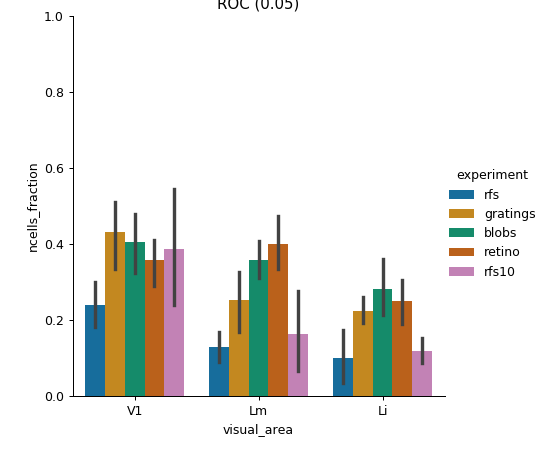

Text(0.5,1,u'ROC (0.05)')

In [537]:
ax = sns.catplot(x="visual_area", y="ncells_fraction", hue='experiment', data=df,
           kind='bar', ci=95, palette='colorblind')

pl.ylim([0, 1])

pl.title('%s (%.2f)' % (responsive_test, responsive_thr))

<IPython.core.display.Javascript object>


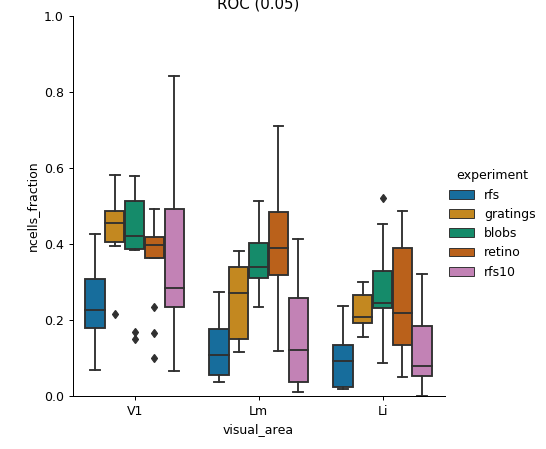

Text(0.5,1,u'ROC (0.05)')

In [553]:
gp = sns.catplot(x="visual_area", y="ncells_fraction", hue='experiment', data=df,
           kind='box', ci=95, palette='colorblind', whis=1.5)

#sns.swarmplot(x="visual_area", y="ncells_fraction", color="k", size=2, data=df, ax=gp.ax);

pl.ylim([0, 1])

pl.title('%s (%.2f)' % (responsive_test, responsive_thr))

<IPython.core.display.Javascript object>


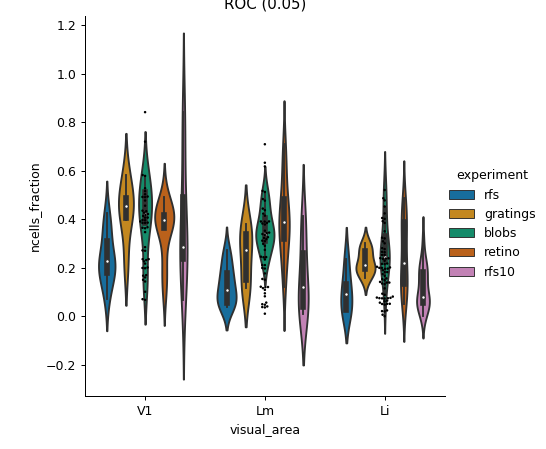

Text(0.5,1,u'ROC (0.05)')

In [550]:
gp = sns.catplot(x="visual_area", y="ncells_fraction", hue='experiment', data=df,
           kind='violin', palette='colorblind') #, whis=1.5)

sns.swarmplot(x="visual_area", y="ncells_fraction", color="k", size=2, data=df, ax=gp.ax);

#pl.ylim([0, 1])

pl.title('%s (%.2f)' % (responsive_test, responsive_thr))
#pl.ylim([0, 1])

pl.title('%s (%.2f)' % (responsive_test, responsive_thr))

<IPython.core.display.Javascript object>


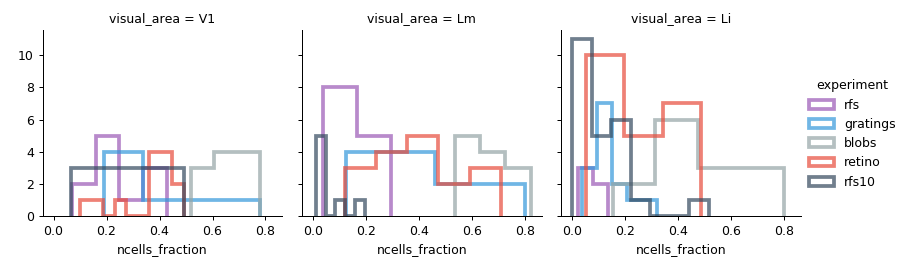

In [309]:
g = sns.FacetGrid(df, col='visual_area', hue='experiment')
g = g.map(sns.distplot, 'ncells_fraction', 
          kde=False,
          #hist=False, rug=True)
         hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7})

g.add_legend()

# Select dataset

In [223]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC097' #'JC059'
session = '20190617' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


experiment = 'rfs'
glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % experiment, 'traces', '%s*' % traceid,\
                      'response_stats_*', 'roistats_results.npz'))

['/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_f924db_traces001_85f376_traces001_db2b5e_traces001_acfba1_traces001_c58358_traces001_205616/response_stats_20190619/roistats_results.npz']

In [227]:
fn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % experiment, 'traces', '%s*' % traceid,\
                      'response_stats_*', 'roistats_results.npz')), key=natural_keys)[-1]

In [229]:
stats = np.load(fn)
stats

In [233]:
stats.keys()

['traceid',
 'sorted_visual',
 'responsivity_test',
 'metric',
 'animalid',
 'sorted_selective',
 'selectivity_test',
 'session',
 'selective_pval',
 'selectivity_posthoc',
 'nrois_total',
 'acquisition',
 'visual_pval']

In [231]:
stats['nrois_total']

array(438)

In [236]:
len(stats['sorted_selective'])

181

In [237]:
g

In [232]:
df[(df['animalid']==animalid) & (df['session']==session)]

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction
71,JC097,rfs,FOV1_zoom2p0x,20190617,V1,262.0,88.0,0.335878
72,JC097,gratings,FOV1_zoom2p0x,20190617,V1,438.0,84.0,0.191781
73,JC097,blobs,FOV1_zoom2p0x,20190617,V1,438.0,276.0,0.630137
74,JC097,retino,FOV1_zoom2p0x,20190617,V1,438.0,169.0,0.385845


In [276]:
df.loc[ix].values

array(['JC113', 'rfs10', 'FOV2_zoom2p0x', '20191012', 'Li', 41.0, 22.0,
       0.53658536585365857], dtype=object)

In [277]:
df.loc[ix]

animalid                   JC113
experiment                 rfs10
fov                FOV2_zoom2p0x
session                 20191012
visual_area                   Li
ncells_total                  41
ncells_active                 22
ncells_fraction         0.536585
Name: 192, dtype: object

In [377]:
for k, v in stats.items():
    if k in ['nrois_total', 'selective_pval', 'visual_pval']:
        stats[k] = float(v)
    elif k in ['sorted_visual', 'sorted_selective']:
        pass
    else:
        stats[k] = str(k)
    

In [391]:
stats
    

{'acquisition': array('FOV1_zoom2p0x',
       dtype='|S13'), 'animalid': array('JC084',
       dtype='|S5'), 'metric': array('zscore',
       dtype='|S6'), 'nrois_total': array(260), 'responsivity_test': array('RManova1',
       dtype='|S8'), 'selective_pval': 0.05, 'selectivity_posthoc': array('dunn',
       dtype='|S4'), 'selectivity_test': array('kruskal_wallis',
       dtype='|S14'), 'session': array('20190522',
       dtype='|S8'), 'sorted_selective': [93,
  155,
  91,
  231,
  69,
  68,
  57,
  59,
  150,
  17,
  177,
  151,
  233,
  148,
  163,
  236,
  178,
  258,
  144,
  97,
  232,
  215,
  75,
  19,
  237,
  123,
  77,
  175,
  33,
  60,
  81,
  245,
  79,
  128,
  63,
  228,
  9,
  38,
  78,
  76,
  188,
  21,
  119,
  193,
  165,
  106,
  152,
  159,
  229,
  135,
  26,
  234,
  67,
  105,
  212,
  70,
  187,
  56,
  1,
  216,
  124,
  116,
  168,
  117,
  71,
  147,
  14,
  243,
  217,
  27,
  61,
  140,
  164,
  122], 'sorted_visual': [93,
  258,
  78,
  259,
  17,
  155

In [274]:
tmp_ign2 = ['JC091_20191008_FOV1_zoom2p0x_rfs10',
           'JC092_20190527_FOV3_zoom2p0x_gratings',
           'JC078_20190430_FOV1_zoom2p0x_rfs']

In [428]:
visual_pval = 0.01
selective_pval = 0.01

In [429]:
ncells_selective = []
ncells_visual = []
keep_ix = []
mismatch = []

#for (visual_area, animalid, session, fov, experiment), grp in df.groupby(['visual_area', 'animalid', 'session', 'fov', 'experiment']):
for ix in df.index.tolist():
    animalid, experiment, fov, session, visual_area, nc_total, _, _ = df.loc[ix].values

    dkey = '_'.join([animalid, session, fov, experiment])
    
    if dkey in tmp_ign2:
        continue
        
    if experiment == 'retino':
        keep_ix.append(ix)
        ncells_selective.append(float(df['ncells_active'][ix]))
        ncells_visual.append(float(df['ncells_active'][ix]))
        continue
    
    if experiment == 'rfs' and int(session)<20190511:
        expname = 'gratings'
    else:
        expname = experiment
    
    # Load calculated stats
    statsfn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname, 'traces', '%s*' % traceid,\
                     'response_stats_*', 'roistats_results.npz')), key=natural_keys)[-1]
    stats = np.load(statsfn)
    stats = dict(stats)
    
    if (stats['selective_pval'] != selective_pval) or (stats['visual_pval'] != visual_pval):

        # Get visual
        visual_fn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname,
                                             'traces', '%s*' % traceid, 'response_stats*',
                                              'responsivity_*', '*_results.json')), key=natural_keys)[-1]
        with open(visual_fn, 'r') as f:
            vis = json.load(f)
        visual_sorted = sorted([(int(k), v['F']) for k, v in vis.items() if v['p'] < visual_pval], key=lambda x: x[1])[::-1]
        visual_pass = [int(k[0]) for k in visual_sorted]

        # Get selective
        selective_fn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname,
                                             'traces', '%s*' % traceid, 'response_stats*',
                                              'selective_*', '*posthoc_dunn.npz')), key=natural_keys)[-1]
        sel = np.load(selective_fn)
        sdict = sel['arr_0'][()]
        selective_sorted = sorted([(int(k), sdict[k]['H']) for k in visual_pass if sdict[k]['p'] < selective_pval], key=lambda x: x[1])[::-1]
        selective_pass = [int(k[0]) for k in selective_sorted]

        # Update summary dict
        stats['sorted_selective'] = selective_pass
        stats['sorted_visual'] = visual_pass
        stats['selective_pval'] = selective_pval
        stats['visual_pval'] = visual_pval
        
    summary_fn = os.path.join(os.path.split(statsfn)[0], 'summary_vis-p%.2f_sel-p%.2f.json' % (visual_pval, selective_pval))
    for k, v in stats.items():
        if k in ['nrois_total', 'selective_pval', 'visual_pval']:
            stats[k] = float(v)
        elif k in ['sorted_visual', 'sorted_selective']:
            pass
        else:
            stats[k] = str(k)
        
    with open(summary_fn, 'w') as f:
        json.dump(stats, f)
    #print("Updated stats")

#     if nc_total != float(stats['nrois_total']):
#         print("Mismatch in N cells, %s (%i v %i)" % (dkey, nc_total, float(stats['nrois_total'])))
#         mismatch.append((dkey, nc_total, float(stats['nrois_total'])))
#         df['ncells_total'][ix] = float(stats['nrois_total'])

    nselective = float(len(stats['sorted_selective']))
    nvisual = float(len(stats['sorted_visual']))
    
    ncells_selective.append(nselective)
    ncells_visual.append(nvisual)
    keep_ix.append(ix)
    
    
    

In [356]:
stats.keys()

['traceid',
 'sorted_visual',
 'responsivity_test',
 'metric',
 'animalid',
 'sorted_selective',
 'selectivity_test',
 'session',
 'selective_pval',
 'selectivity_posthoc',
 'nrois_total',
 'acquisition',
 'visual_pval']

In [430]:
df.shape

(185, 8)

In [431]:
len(keep_ix)

182

In [432]:
fdf = df.loc[keep_ix].reset_index(drop=True)

In [433]:
fdf.shape

(182, 8)

In [434]:
df.head()

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,260.0,111.0,0.426923
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,260.0,127.0,0.488462
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,260.0,180.0,0.692308
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,238.0,42.0,0.176471


In [435]:
fdf.head()

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,260.0,111.0,0.426923
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,260.0,127.0,0.488462
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,260.0,180.0,0.692308
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,238.0,42.0,0.176471


In [436]:
fdf['ncells_selective'] = np.array([float(i) for i in ncells_selective])
fdf['ncells_visual'] = np.array([float(i) for i in ncells_visual])
fdf['fraction_selective'] = fdf['ncells_selective'] / fdf['ncells_total']
fdf['fraction_visual'] = fdf['ncells_visual'] / fdf['ncells_total']
fdf['fraction_selective_visual'] = fdf['ncells_selective'] / fdf['ncells_visual']


In [437]:
fdf.head()

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction,ncells_selective,ncells_visual,fraction_selective,fraction_visual,fraction_selective_visual
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,260.0,111.0,0.426923,54.0,104.0,0.207692,0.400000,0.519231
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,260.0,127.0,0.488462,180.0,231.0,0.692308,0.888462,0.779221
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,260.0,180.0,0.692308,128.0,211.0,0.492308,0.811538,0.606635
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,260.0,100.0,0.384615,100.0,100.0,0.384615,0.384615,1.000000
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,238.0,42.0,0.176471,10.0,66.0,0.042017,0.277311,0.151515


<IPython.core.display.Javascript object>


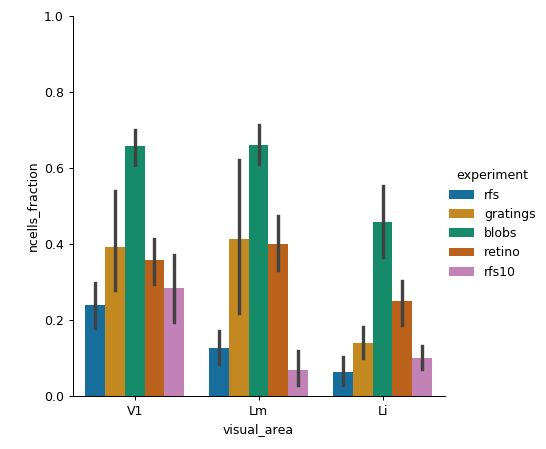

(0, 1)

In [438]:
ax = sns.catplot(x="visual_area", y="ncells_fraction", hue='experiment', data=fdf,
           kind='bar', ci=95, palette='colorblind')
pl.ylim([0, 1])

#### Look at selective

<IPython.core.display.Javascript object>


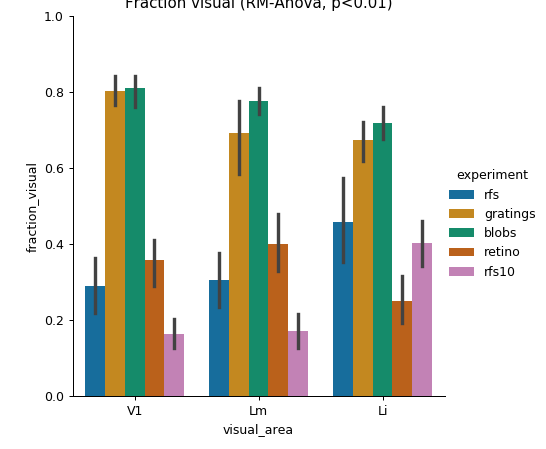

(0, 1)

In [440]:
ax = sns.catplot(x="visual_area", y="fraction_visual", hue='experiment', data=fdf,
           kind='bar', ci=95, palette='colorblind')
pl.title("Fraction visual (RM-Anova, p<%.2f)" % visual_pval)
pl.ylim([0, 1])

<IPython.core.display.Javascript object>


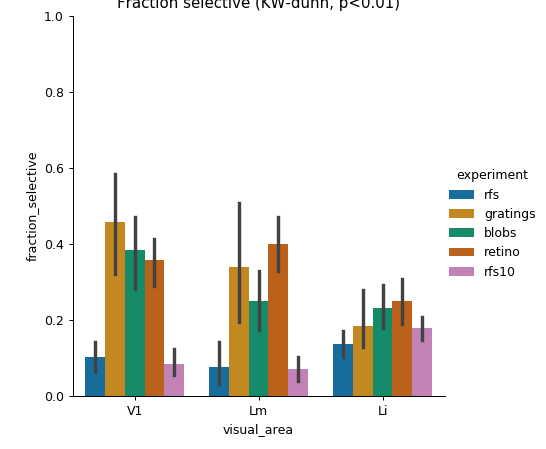

(0, 1)

In [441]:
ax = sns.catplot(x="visual_area", y="fraction_selective", hue='experiment', data=fdf,
           kind='bar', ci=95, palette='colorblind')
pl.title("Fraction selective (KW-dunn, p<%.2f)" % selective_pval)
pl.ylim([0, 1])

<IPython.core.display.Javascript object>


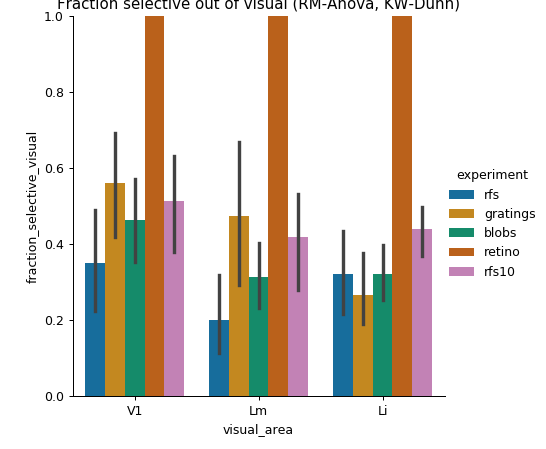

(0, 1)

In [442]:
ax = sns.catplot(x="visual_area", y="fraction_selective_visual", hue='experiment', data=fdf,
           kind='bar', ci=95, palette='colorblind')
pl.title("Fraction selective out of visual (RM-Anova, KW-Dunn)")
pl.ylim([0, 1])

In [323]:
fdf[(fdf['animalid']=='JC120') & (fdf['session']=='20191111')]

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction,ncells_selective,ncells_visual,fraction_selective,fraction_visual,fraction_selective_visual
106,JC120,rfs10,FOV1_zoom2p0x,20191111,Li,190.0,4.0,0.021053,108.0,139.0,0.568421,0.731579,0.776978
107,JC120,gratings,FOV1_zoom2p0x,20191111,Li,190.0,7.0,0.036842,132.0,165.0,0.694737,0.868421,0.800000
108,JC120,blobs,FOV1_zoom2p0x,20191111,Li,190.0,29.0,0.152632,138.0,165.0,0.726316,0.868421,0.836364
109,JC120,retino,FOV1_zoom2p0x,20191111,Li,190.0,14.0,0.073684,14.0,14.0,0.073684,0.073684,1.000000


<IPython.core.display.Javascript object>


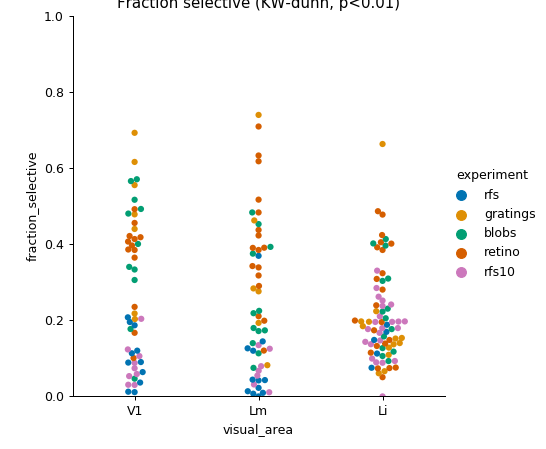

(0, 1)

In [446]:
ax = sns.catplot(x="visual_area", y="fraction_selective", hue='experiment', data=fdf,
           kind='swarm', palette='colorblind')
pl.title("Fraction selective (KW-dunn, p<%.2f)" % selective_pval)
pl.ylim([0, 1])

<IPython.core.display.Javascript object>


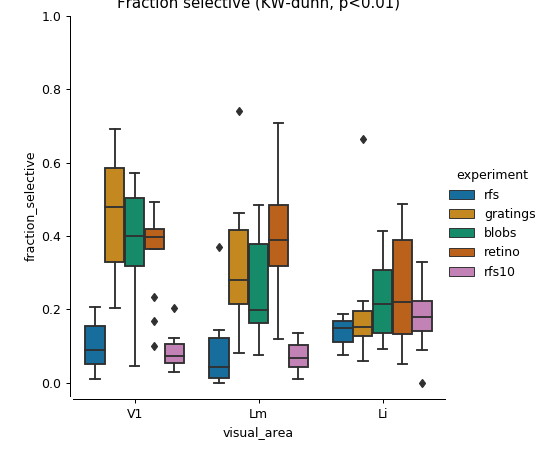

In [460]:
ax = sns.catplot(x="visual_area", y="fraction_selective", hue='experiment', data=fdf,
           kind='box', palette='colorblind')
pl.title("Fraction selective (KW-dunn, p<%.2f)" % selective_pval)
pl.ylim([pl.ylim()[0], 1])
sns.despine(offset=2) #trim=True)

In [269]:
animalid

'JC078'

In [270]:
experiment

'rfs'

In [271]:
session

'20190430'

In [272]:
fov

'FOV1_zoom2p0x'

In [273]:
expname

'gratings'

In [261]:
'JC091_20191008_FOV1_zoom2p0x_rfs10'

'JC091_20191008_FOV1_zoom2p0x_rfs10'

In [ ]:
'JC092_20190527_FOV3_zoom2p0x_gratings'

In [ ]:
'JC078_20190430_FOV1_zoom2p0x_rfs'

In [324]:
stats.keys()

['traceid',
 'sorted_visual',
 'responsivity_test',
 'metric',
 'animalid',
 'sorted_selective',
 'selectivity_test',
 'session',
 'selective_pval',
 'selectivity_posthoc',
 'nrois_total',
 'acquisition',
 'visual_pval']

In [325]:
stats['visual_pval']

array(0.5)

In [326]:
stats['selective_pval']

array(0.5)

In [327]:
selective_fn = glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname,
                                     'traces', '%s*' % traceid, 'response_stats*',
                                      'selective_*', '*posthoc_dunn.npz'))[-1]
selective_fn

'/n/coxfs01/2p-data/JC113/20191012/FOV2_zoom2p0x/combined_rfs10_static/traces/traces001_0cc7eb_traces001_2f7e82_traces001_4ccb5d_traces001_7aeac9_traces001_9c7cc7/response_stats_20191013/selective_KW_dunn/selectivity_KW_posthoc_dunn.npz'

In [328]:
sel = np.load(selective_fn)
sel.keys()

['arr_0']

In [335]:
visual_pval = 0.05
selective_pval = 0.01

visual_fn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname,
                                     'traces', '%s*' % traceid, 'response_stats*',
                                      'responsivity_*', '*_results.json')), key=natural_keys)[-1]
with open(visual_fn, 'r') as f:
    vis = json.load(f)
visual_pass = [int(k) for k, v in vis.items() if v['p'] < 0.05]

selective_fn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname,
                                     'traces', '%s*' % traceid, 'response_stats*',
                                      'selective_*', '*posthoc_dunn.npz')), key=natural_keys)[-1]
sel = np.load(selective_fn)
sdict = sel['arr_0'][()]
selective_pass = [int(k) for k in visual_pass if sdict[k]['p'] < selective_pval]


'/n/coxfs01/2p-data/JC113/20191012/FOV2_zoom2p0x/combined_rfs10_static/traces/traces001_0cc7eb_traces001_2f7e82_traces001_4ccb5d_traces001_7aeac9_traces001_9c7cc7/response_stats_20191013/responsivity_RManova1/visual_rois_RManova1_results.json'

In [332]:
sdict = sel['arr_0'][()]


In [333]:
len(sdict.keys())

236

In [365]:
sdict[0]

{'H': 228.95079141146653,
 'p': 4.0303462068176008e-20,
 'p_rank':            config001     config002  config003  config004  config005  \
 config001  -1.000000  2.789419e-02   0.256265   0.244135   0.148661   
 config002   0.027894 -1.000000e+00   0.287552   0.301109   0.450554   
 config003   0.256265  2.875522e-01  -1.000000   0.976506   0.757311   
 config004   0.244135  3.011095e-01   0.976506  -1.000000   0.779812   
 config005   0.148661  4.505535e-01   0.757311   0.779812  -1.000000   
 config006   0.534099  1.147933e-01   0.607600   0.587162   0.410783   
 config007   0.697533  7.027742e-02   0.455298   0.437713   0.291139   
 config008   0.498189  1.281523e-01   0.647009   0.625995   0.443120   
 config009   0.433074  1.571186e-01   0.725347   0.703372   0.509038   
 config010   0.213522  3.396620e-01   0.913461   0.936855   0.841214   
 config011   0.078913  6.586736e-01   0.534099   0.553642   0.754473   
 config012   0.097088  5.894493e-01   0.600367   0.621008   0.829878  

In [ ]:

visual_fn = sorted(glob.glob(os.path.join(rootdir, animalid, session, fov, '*%s*' % expname,
                                     'traces', '%s*' % traceid, 'response_stats*',
                                      'responsivity_*', '*_results.json')), key=natural_keys)[-1]
visual_fn

In [336]:
with open(visual_fn, 'r') as f:
    vis = json.load(f)

visual_pass = [int(k) for k, v in vis.items() if v['p'] < 0.05]
selective_pass = [int(k) for k in visual_pass if sdict[k]['p'] < 0.01]



In [340]:
vis[str(0)]

{u'F': 60.83158005371948,
 u'df': 1,
 u'dim': [2],
 u'eta': 0.0038697108373295466,
 u'eta2_p': 0.04408623554720438,
 u'mse': 309.88333771786256,
 u'p': 1.2556506755744401e-14}

In [345]:
visual_pass = [int(k) for k, v in vis.items() if v['p'] < 0.05]
len(visual_pass)

150

In [342]:
len([int(k) for k, v in vis.items() if v['p'] < 0.05])


150

In [343]:
len([int(k) for k, v in vis.items() if v['p'] < 0.5])


236

<IPython.core.display.Javascript object>


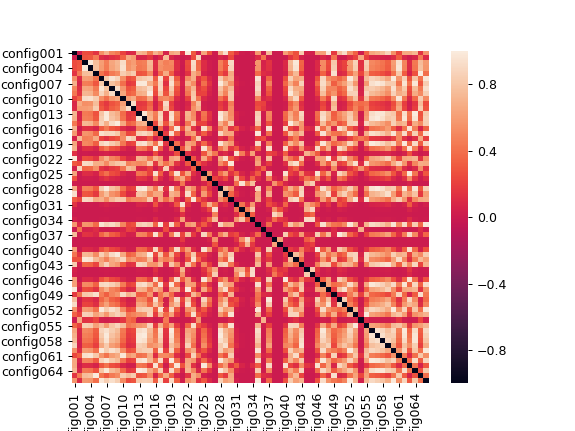

In [462]:
pl.figure()
sns.heatmap(sdict[0]['p_rank'])


In [354]:
len([k for k in visual_pass if sdict[k]['p'] < 0.01])

84

In [334]:
fdf[(fdf['animalid']=='JC113') & (fdf['session']=='20191012')]

,animalid,experiment,fov,session,visual_area,ncells_total,ncells_active,ncells_fraction,ncells_selective,ncells_visual,fraction_selective,fraction_visual,fraction_selective_visual
169,JC113,retino,FOV3_zoom2p0x,20191012,Lm,551.0,175.0,0.317604,175.0,175.0,0.317604,0.317604,1.000000
170,JC113,rfs10,FOV3_zoom2p0x,20191012,Lm,551.0,20.0,0.036298,341.0,400.0,0.618875,0.725953,0.852500
174,JC113,retino,FOV1_zoom2p0x,20191012,Li,317.0,47.0,0.148265,47.0,47.0,0.148265,0.148265,1.000000
175,JC113,rfs10,FOV1_zoom2p0x,20191012,Li,317.0,2.0,0.006309,236.0,274.0,0.744479,0.864353,0.861314
180,JC113,retino,FOV2_zoom2p0x,20191012,Li,286.0,110.0,0.384615,110.0,110.0,0.384615,0.384615,1.000000
181,JC113,rfs10,FOV2_zoom2p0x,20191012,Li,286.0,22.0,0.076923,214.0,236.0,0.748252,0.825175,0.906780
